In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd

# Cargamos dataset
df = pd.read_csv("../data/preprocessed/dataset.csv")
print("Tamaño del dataset:", df.shape)
df.head()


Tamaño del dataset: (24, 4)


,Unnamed: 0,Review_text,Rating,review_clean
0,0,Have been waiting on their reaction on an appe...,NaN,waiting reaction appeal sentit month still res...
1,1,Airbnb allowing hosts extort money from the gu...,NaN,airbnb allowing host extort money guest mistak...
2,2,"Just lost over £3,000 on a holiday to Thailand...",Rated 1 out of 5 stars,lost holiday thailand absolutely disgusting ca...
3,3,"Disgusting behavior from one of your hosts, on...",Rated 1 out of 5 stars,disgusting behavior one host reading review fi...
4,4,"Just lost over £3,000 on a holiday to Thailand...",Rated 1 out of 5 stars,lost holiday thailand absolutely disgusting ca...


In [3]:
# Extraigo la calificación del texto en la columna rating
df['stars'] = df['Rating'].str.extract('(\\d+)')
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')
df

,Unnamed: 0,Review_text,Rating,review_clean,stars
0,0,Have been waiting on their reaction on an appe...,NaN,waiting reaction appeal sentit month still res...,NaN
1,1,Airbnb allowing hosts extort money from the gu...,NaN,airbnb allowing host extort money guest mistak...,NaN
2,2,"Just lost over £3,000 on a holiday to Thailand...",Rated 1 out of 5 stars,lost holiday thailand absolutely disgusting ca...,1.0
3,3,"Disgusting behavior from one of your hosts, on...",Rated 1 out of 5 stars,disgusting behavior one host reading review fi...,1.0
4,4,"Just lost over £3,000 on a holiday to Thailand...",Rated 1 out of 5 stars,lost holiday thailand absolutely disgusting ca...,1.0
5,5,Was part of the group of 7 people who stayed a...,NaN,part group people stayed place everything apar...,NaN
6,6,I recently had a very disappointing experience...,Rated 1 out of 5 stars,recently disappointing experience airbnb stay ...,1.0
7,7,I recently booked with BRIAN LAMBERT in LENOI...,Rated 1 out of 5 stars,recently booked brian lambert lenoir nc amenit...,1.0
8,8,"What an awful experience,it is very difficult ...",NaN,awful experienceit difficult conversation tele...,NaN
9,9,Airbnb allowing hosts extort money from the gu...,NaN,airbnb allowing host extort money guestsby mis...,NaN


# Distribución de calificaciones

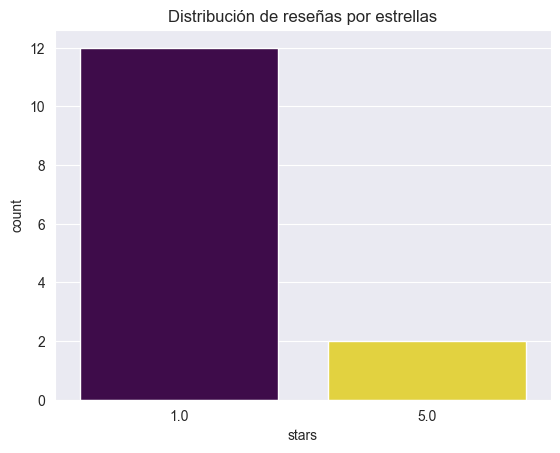

stars
1.0    85.714286
5.0    14.285714
Name: proportion, dtype: float64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="stars", data=df, palette="viridis", hue="stars", legend=False)
plt.title("Distribución de reseñas por estrellas")
plt.show()

# Conteo numérico
df["stars"].value_counts(normalize=True) * 100

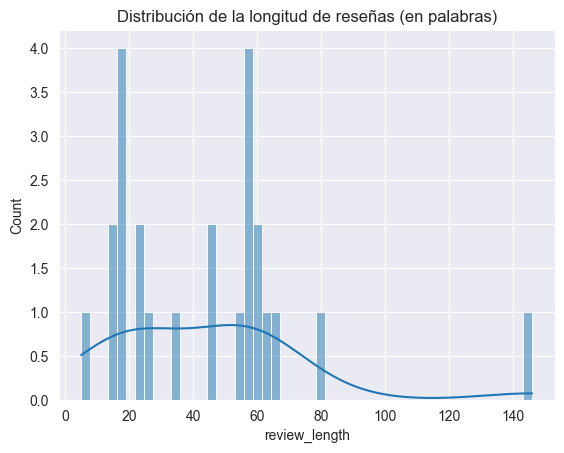

In [5]:
# Calcular longitud de reseña en tokens
df["review_length"] = df["review_clean"].apply(lambda x: len(str(x).split()))
# Histograma
sns.histplot(df["review_length"], bins=50, kde=True)
plt.title("Distribución de la longitud de reseñas (en palabras)")
plt.show()

In [6]:
# Comparar longitudes por clase
df.groupby("stars")["review_length"].mean()

stars
1.0    40.333333
5.0    33.000000
Name: review_length, dtype: float64

In [7]:
from collections import Counter

all_words = " ".join(df["review_clean"])
word_counts = Counter(all_words.split())

print("Top 20 palabras más frecuentes:")
word_counts.most_common(20)

Top 20 palabras más frecuentes:


[('airbnb', 36),
 ('host', 33),
 ('guest', 14),
 ('review', 12),
 ('customer', 11),
 ('service', 10),
 ('even', 9),
 ('platform', 8),
 ('apartment', 7),
 ('one', 7),
 ('use', 7),
 ('support', 7),
 ('experience', 7),
 ('airbnbs', 7),
 ('see', 6),
 ('money', 6),
 ('instead', 6),
 ('place', 6),
 ('hour', 6),
 ('stay', 6)]

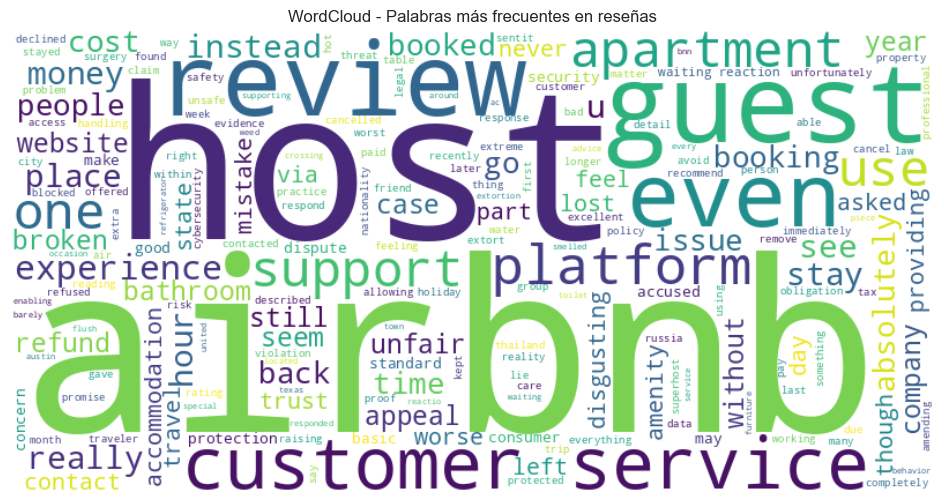

In [8]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Palabras más frecuentes en reseñas")
plt.show()

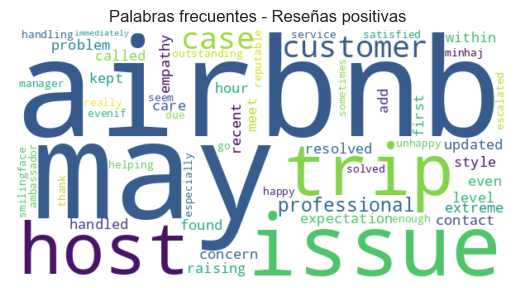

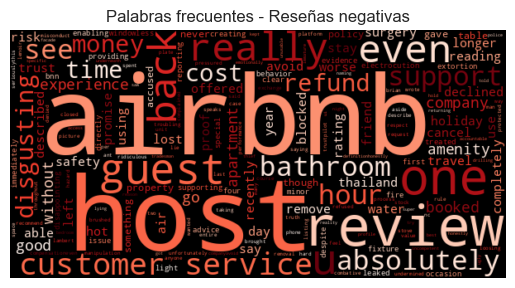

In [9]:
 = WordCloud(width=600, height=300, background_color="white").generate(positive_words)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Palabras frecuentes - Reseñas positivas")
plt.show()positive_words = " ".join(df[df["stars"] >= 4]["review_clean"])
negative_words = " ".join(df[df["stars"] <= 2]["review_clean"])

# Wordcloud positivas
wc_pos = WordCloud(width=600, height=300, background_color="white").generate(positive_words)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Palabras frecuentes - Reseñas positivas")
plt.show()

# Wordcloud negativas
wc_neg = WordCloud(width=600, height=300, background_color="black", colormap="Reds").generate(negative_words)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Palabras frecuentes - Reseñas negativas")
plt.show()
